# <CENTER>FLIGHT FARE PREDICTION<CENTER/>
    

### <CENTER>PREDICT FLIGHT PRICE USING 2019 DATA<CENTER>
SOURCE: KAGGLE DATASET(Flight Fare Prediction MH) | link: https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

##### Prices of flight ticket varies abruptly and it becomes hectic for a user to decide on different deals. A flight fare prediction model will help inform the travellers with the optimal time to plan their travel and understand trends in the airline industry.

DATASET INFO:
* Size of training set: 10683 records

* Size of test set: 2671 records

* FEATURES: Airline: The name of the airline.

* Date_of_Journey: The date of the journey

* Source: The source from which the service begins.

* Destination: The destination where the service ends.

* Route: The route taken by the flight to reach the destination.

* Dep_Time: The time when the journey starts from the source.

* Arrival_Time: Time of arrival at the destination.

* Duration: Total duration of the flight.

* Total_Stops: Total stops between the source and destination.

* Additional_Info: Additional information about the flight

* Price: The price of the ticket

## <CENTER>PART 1- DATA LOADING AND PRE-PROCESSING<CENTER>  

In [116]:
#IMPORTING DEPENDENCIES
import pandas as pd
import numpy as np
#Visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import plotly.express as px
#Pre processing
import missingno as msno 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, binarize
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [117]:
#Import the training and testing dataset
#As our data is in the form of an excel file we will use read_excel to load the data
data=pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Test_set.xlsx")

In [118]:
#Analyzing the first five rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [120]:
#dataset columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [121]:
#Shape of the data
data.shape

(10683, 11)

In [122]:
#Shape of the test data
test.shape

(2671, 10)

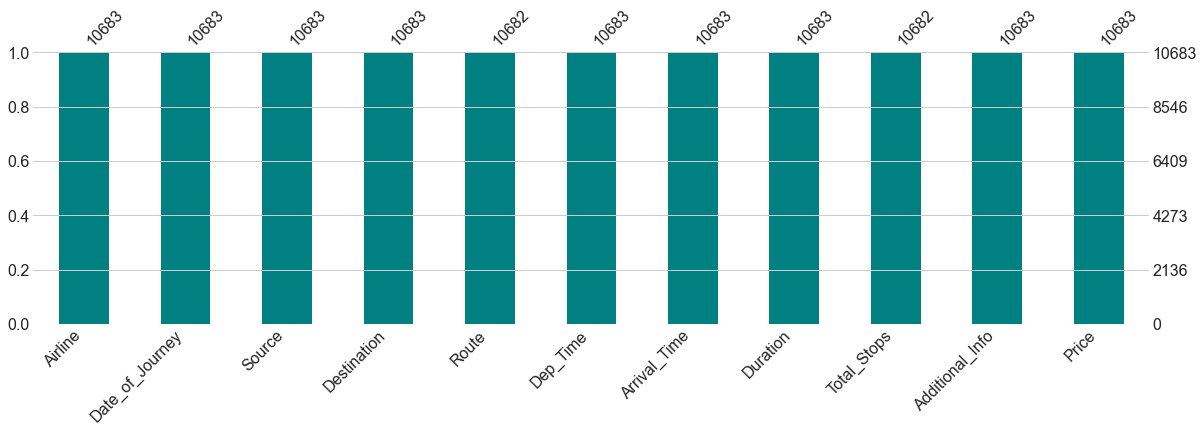

In [123]:
#Check for missing values in the dataset
msno.bar(data, figsize=(20,5),color='Teal')

Looks like two of the columns have missing data

In [124]:
#Lets check which columns have missing data with the count
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [125]:
#Drop missing data as only 2 records have missing data
data.dropna(inplace=True)

'Route' and 'Total_stops' have one missing data each, which isn't a thing to worry.

In [126]:
#Checking duplicate records
data.duplicated().sum()

220

We see that the dataset contains 220 duplicated records.

In [127]:
# Drop duplicate records
data.drop_duplicates(keep='first',inplace=True)

In [128]:
data.shape

(10462, 11)

In [129]:
#analyze the target variable
data["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [130]:
# Summary of numerical variables(price)
data.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


## <CENTER>PART 2 - FEATURE EXTRACTION<CENTER>

In [131]:
# Combine the train and test set to carry out feature extraction techniques
all_data=pd.concat([data,test],axis = 0)

In [132]:
all_data.shape

(13133, 11)

In [133]:
all_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [134]:
#As we already have source and destination column we can drop the route column
all_data.drop('Route',axis = 1,inplace = True)

 #### 1- Convert Total_Stops to numerical feature

In [135]:
all_data.Total_Stops.value_counts()

1 stop      7056
non-stop    4324
2 stops     1697
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

In [136]:
no_stops = {'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4}
all_data.Total_Stops = all_data.Total_Stops.map(no_stops)

In [137]:
all_data.Total_Stops.value_counts()

1    7056
0    4324
2    1697
3      54
4       2
Name: Total_Stops, dtype: int64

#### 2- Extracting new date-time features from Date_of_Journey

In [138]:
all_data['Day']=pd.to_datetime(all_data['Date_of_Journey']).dt.day #Generate the day
all_data['year']=pd.to_datetime(all_data['Date_of_Journey']).dt.year # Generate the year
all_data['month']=pd.to_datetime(all_data['Date_of_Journey']).dt.month #Generate the month

all_data['Month_name']=pd.to_datetime(all_data['Date_of_Journey']).dt.strftime('%B')  #Generate the Monthname
all_data['Month_num']=pd.to_datetime(all_data['Date_of_Journey']).dt.strftime('%m')   #Generate the Month Num
all_data['Week_day']=pd.to_datetime(all_data['Date_of_Journey']).dt.strftime('%A')  #Generate the Weekday
all_data['Week_num']=pd.to_datetime(all_data['Date_of_Journey']).dt.strftime('%W') # Generate the week number
all_data['Date_categ']=np.where(all_data['Day']<16,"First Half","Second Half") #Categorize the month into first half and second half

#As the date of journey column is of no use to us, we can drop it
all_data.drop('Date_of_Journey',axis = 1,inplace = True)

In [139]:
all_data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,year,month,Month_name,Month_num,Week_day,Week_num,Date_categ
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,2019,3,March,03,Sunday,11,Second Half
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662.0,5,2019,1,January,01,Saturday,00,First Half


#### 3- Extracting new features from Dep_Time and Arrival_Time

In [140]:
# Extracting 4 new features in form of hour and mintues of departure time and arrival time.
all_data["Dep_hour"] = pd.to_datetime(all_data["Dep_Time"]).dt.hour
all_data["Dep_min"] = pd.to_datetime(all_data["Dep_Time"]).dt.minute
all_data["Arr_hour"] = pd.to_datetime(all_data["Arrival_Time"]).dt.hour
all_data["Arr_min"] = pd.to_datetime(all_data["Arrival_Time"]).dt.minute

#As Dep_Time and Arrival_Time column is of no use to us, we can drop it
all_data.drop('Dep_Time',axis = 1,inplace = True)
all_data.drop('Arrival_Time',axis = 1,inplace = True)


In [141]:
all_data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,year,month,Month_name,Month_num,Week_day,Week_num,Date_categ,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,2019,3,March,03,Sunday,11,Second Half,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,5,2019,1,January,01,Saturday,00,First Half,5,50,13,15


In [142]:
all_data.year.value_counts()

2019    13133
Name: year, dtype: int64

In [143]:
#As all the records are from 2019 we can drop the year column
all_data.drop('year',axis = 1,inplace = True)

#### 4- Duration
Extracting duration minutes, duration hours,total duration in minutes features from the Duration column.

In [144]:
# Extracting duration hour and minutes
d = list(all_data.Duration)
duration_hour = []
duration_min = []

for time in d:
    if len(time.split()) == 2: #record with both hour and mintues data
        hour = time.split()[0].rsplit('h')[0]
        mintues = time.split()[1].rsplit('m')[0]
        duration_hour.append(hour)
        duration_min.append(mintues)
    else: 
        #data with only hour or mintue information.
        if 'h' in time.split()[0]:
            hour =  time.split()[0].rsplit('h')[0]
            duration_hour.append(int(hour))
            duration_min.append(0) 
        elif 'm'in time.split()[0]:
            mintues =  time.split()[0].rsplit('m')[0]
            duration_hour.append(0)
            duration_min.append(int(mintues))
            

In [145]:
#Check whether the length of the two lists we just created is same with the data set.
len(duration_hour) == len(duration_min ) == len(all_data)

True

In [146]:
all_data['duration_hour'] = pd.DataFrame(duration_hour).astype('int32')
all_data['duration_min'] = pd.DataFrame(duration_min).astype('int32')

In [147]:
#Extracting total duration minutes
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
all_data['Duration']=all_data['Duration'].apply(duration)


In [148]:
all_data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,month,Month_name,Month_num,Week_day,Week_num,Date_categ,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897.0,24,3,March,03,Sunday,11,Second Half,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,445,2,No info,7662.0,5,1,January,01,Saturday,00,First Half,5,50,13,15,7,25


#### 5- Extracting morning,evening,night or afternoon events from departure time & arrival time of the flight

In [149]:
def deparrtime(tt):
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
all_data['Dep_type']=all_data['Dep_hour'].apply(deparrtime)
all_data['Arr_type']=all_data['Arr_hour'].apply(deparrtime)

In [150]:
all_data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,month,Month_name,...,Week_num,Date_categ,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min,Dep_type,Arr_type
0,IndiGo,Banglore,New Delhi,170,0,No info,3897.0,24,3,March,...,11,Second Half,22,20,1,10,2,50,Night,Night
1,Air India,Kolkata,Banglore,445,2,No info,7662.0,5,1,January,...,00,First Half,5,50,13,15,7,25,Morning,Afternoon


#### 6 - Additional Info

In [151]:
all_data.Additional_Info.value_counts()

No info                         10330
In-flight meal not included      2370
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [152]:
#Let's drop Additional_info as it does not provide any value.
all_data.drop('Additional_Info',axis = 1,inplace = True)


#### So, finally let's have a look at the transformed dataframe:

In [153]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        13133 non-null  object 
 1   Source         13133 non-null  object 
 2   Destination    13133 non-null  object 
 3   Duration       13133 non-null  object 
 4   Total_Stops    13133 non-null  int64  
 5   Price          10462 non-null  float64
 6   Day            13133 non-null  int64  
 7   month          13133 non-null  int64  
 8   Month_name     13133 non-null  object 
 9   Month_num      13133 non-null  object 
 10  Week_day       13133 non-null  object 
 11  Week_num       13133 non-null  object 
 12  Date_categ     13133 non-null  object 
 13  Dep_hour       13133 non-null  int64  
 14  Dep_min        13133 non-null  int64  
 15  Arr_hour       13133 non-null  int64  
 16  Arr_min        13133 non-null  int64  
 17  duration_hour  13133 non-null  int32  
 18  duratio

As the test data does not include the price column(target variable) we see that price contains 10462 records.

In [154]:
#Separating the data into original format( Train and Test)
data1 = all_data.iloc[:10462]
test1 = all_data.iloc[10462:]

In [155]:
data1.shape

(10462, 21)

In [156]:
test1.shape

(2671, 21)

## <CENTER>PART 3- EXPLORATORY DATA ANALYSIS<CENTER>

#### 1- PRICE v/s AIRLINE

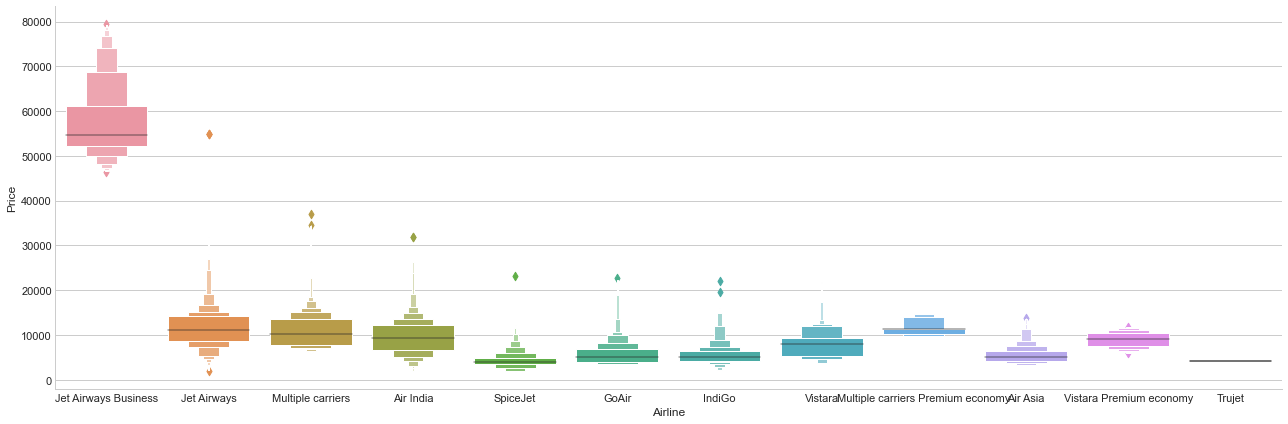

In [157]:
sns.catplot(y = "Price", x = "Airline", data = data1.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

* Jet Airways Business has the highest median price across Airlines
* Rest of the carriers have a median price ranging from 8k-9k


#### 2- Airline record count

In [158]:
fig = px.histogram(data1, x="Airline", nbins=20,color='Airline')
fig.show()

* Most of the data are from Jet Airways, IndiGo and AirIndia

#### 3- Flight count month wise

In [159]:
fig = px.pie(data1, names='Month_name', color_discrete_sequence=px.colors.sequential.Aggrnyl,hole=.4)
fig.show()

* March, May, June records constitute 60% of the overall data.

#### 4- SOURCE v/s PRICE

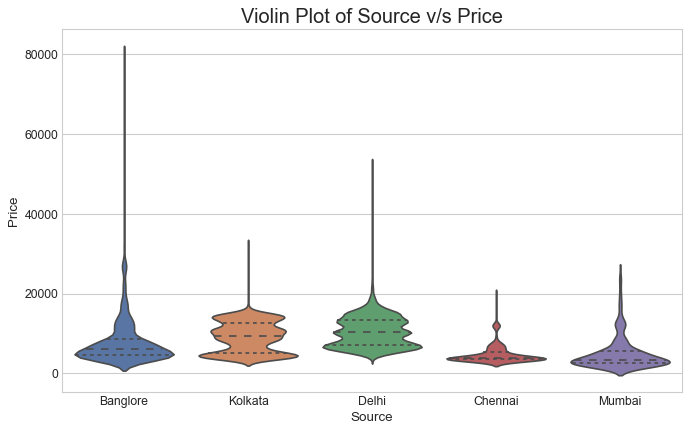

In [160]:
plt.figure(figsize=(10,6), dpi= 80)
sns.violinplot(x='Source', y='Price', data=data1, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Source v/s Price', fontsize=18)
plt.show()

* Looks like flights starting from Delhi and Kolkata have higher ticket price

#### 5- DESTINATION v/s PRICE

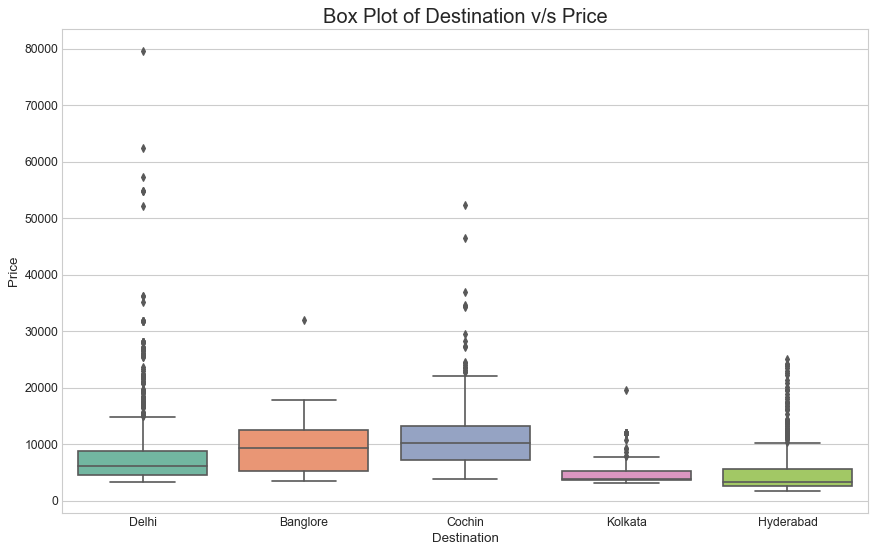

In [161]:
#Convert New Delhi and Delhi because both are same
data1["Destination"] = data1["Destination"].replace({'New Delhi': 'Delhi'})



plt.figure(figsize=(13,8), dpi= 80)
sns.boxplot(x="Destination",y="Price",data=data1, palette="Set2")

# Decoration
plt.title('Box Plot of Destination v/s Price', fontsize=18)
plt.show()

* Flights arriving to Cochin have higher ticket price

#### 6- Month v/s Price

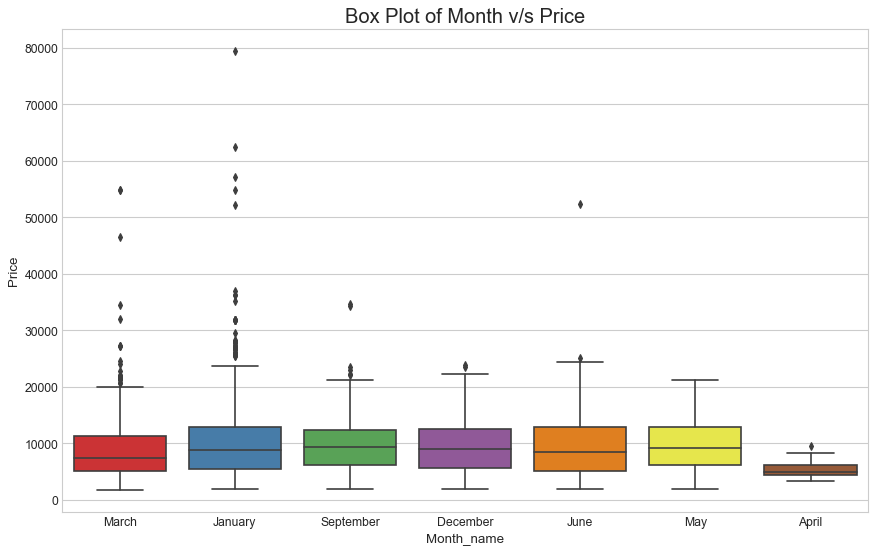

In [162]:
plt.figure(figsize=(13,8), dpi= 80)
sns.boxplot(x="Month_name",y="Price",data=data1, palette="Set1")

# Decoration
plt.title('Box Plot of Month v/s Price', fontsize=18)
plt.show()

#### 7- Duration v/s Price


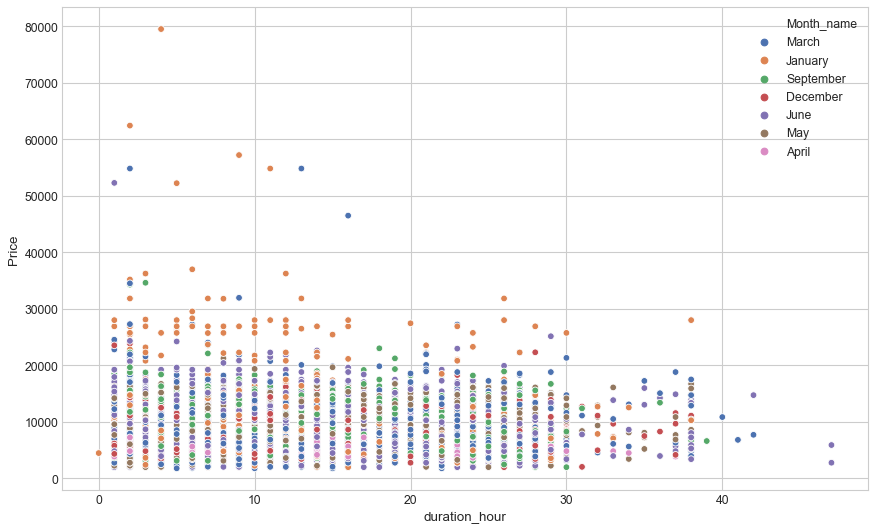

In [163]:
plt.figure(figsize=(13,8), dpi= 80)
sns.scatterplot(data=data1, x="duration_hour", y="Price",hue="Month_name")

* We know that usually the longer duration flights have higher ticket price, but we do not see any such trend from the above diagram.
* Flights in January, shows somewhat higher ticket price

#### 8- Total stops v/s Price

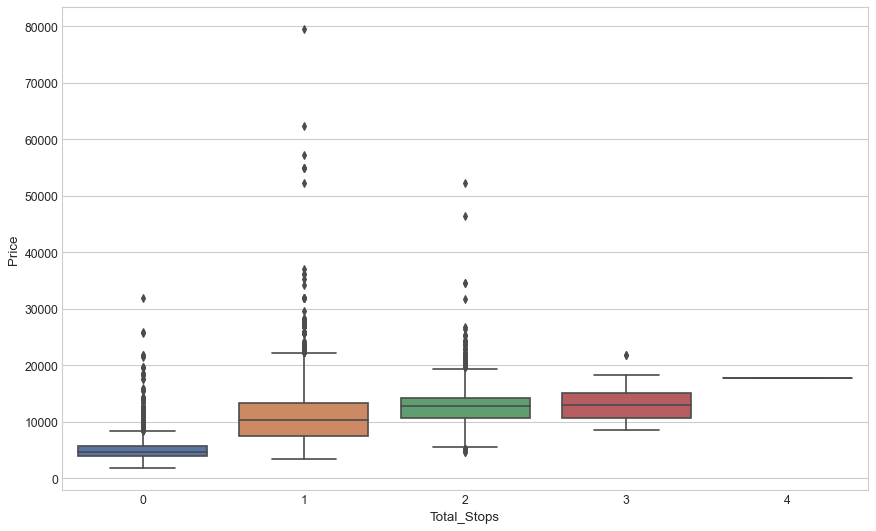

In [164]:
plt.figure(figsize=(13,8), dpi= 80)
sns.boxplot(x="Total_Stops", y="Price", data=data1)


#### 9- Departure and arrival type(morning/afternoon/evening/night)

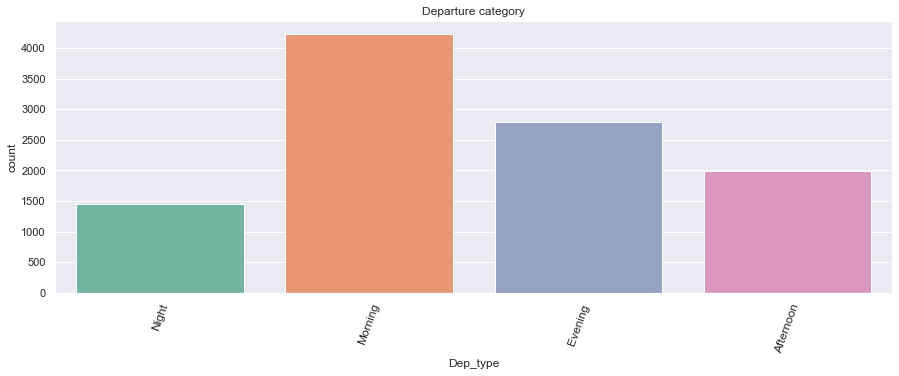

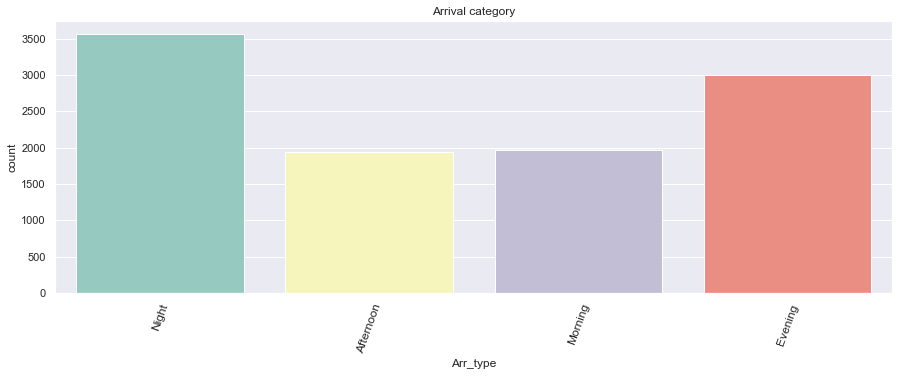

In [165]:
plt.figure(figsize=(15,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x="Dep_type", data=data1,palette="Set2")
plt.title("Departure category")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70,fontsize=12);
plt.figure(figsize=(15,5)) 
sns.set(style="darkgrid")
ax = sns.countplot(x="Arr_type", data=data1,palette="Set3")
plt.title("Arrival category")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70,fontsize=12);

* Most of the flights have started in morning and majority of the flights have arrived at night

#### 10- Weekday v/s Price

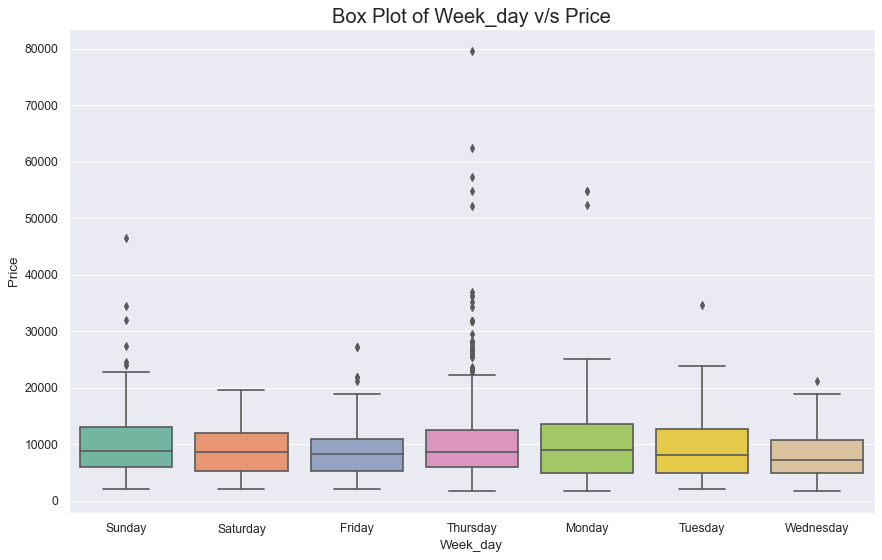

In [166]:
plt.figure(figsize=(13,8), dpi= 80)
sns.boxplot(x="Week_day",y="Price",data=data1, palette="Set2")

# Decoration
plt.title('Box Plot of Week_day v/s Price', fontsize=18)
plt.show()

* Nothing much can be drawn from the above diagram


###  <CENTER>PART 4-ENCODING CATEGORICAL DATA<CENTER>
As the machine learning model can only read numerical values we need to encode categorical features into numerical values.

In [167]:
#Encoding is done now, as i wanted the categorical data to perform EDA
#Let's bring back the test set to perform encoding
all_data1=pd.concat([data1,test1],axis = 0)

In [168]:
all_data1.shape

(13133, 21)

In [169]:
test1.shape

(2671, 21)

In [170]:
data1.shape

(10462, 21)

In [171]:
all_data1.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         0
Price            2671
Day                 0
month               0
Month_name          0
Month_num           0
Week_day            0
Week_num            0
Date_categ          0
Dep_hour            0
Dep_min             0
Arr_hour            0
Arr_min             0
duration_hour       0
duration_min        0
Dep_type            0
Arr_type            0
dtype: int64

In [172]:
#Convert duration,Month_num and Week_num to int type
all_data1["Duration"] = all_data1["Duration"].astype(int)
all_data1["Month_num"] = all_data1["Month_num"].astype(int)
all_data1["Week_num"] = all_data1["Week_num"].astype(int)

In [173]:
#Drop Month_name as we already have Month_num
all_data1.drop('Month_name',axis = 1,inplace = True)

In [174]:
# Let's seperate the numerical and categorical data and store them in seperate dataframes
numeric_data = all_data1.select_dtypes(include=np.number)
categorical_data = all_data1.select_dtypes(exclude=np.number)

In [175]:
categorical_data

,Airline,Source,Destination,Week_day,Date_categ,Dep_type,Arr_type
0,IndiGo,Banglore,Delhi,Sunday,Second Half,Night,Night
1,Air India,Kolkata,Banglore,Saturday,First Half,Morning,Afternoon
2,Jet Airways,Delhi,Cochin,Friday,First Half,Morning,Night
3,IndiGo,Kolkata,Banglore,Thursday,First Half,Evening,Night
4,IndiGo,Banglore,Delhi,Thursday,First Half,Evening,Night
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,Thursday,First Half,Evening,Evening
2667,IndiGo,Kolkata,Banglore,Wednesday,Second Half,Afternoon,Evening
2668,Jet Airways,Delhi,Cochin,Monday,First Half,Night,Night
2669,Air India,Delhi,Cochin,Monday,First Half,Night,Evening


Categorical data can be encoded in 2 methods mainly:

#### **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
#### **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [176]:
# We will perform one hot encoding for Airline,Source, Destination and Date_Categ(Using pandas dummies)
# We will perform label encoding for Week_day, Dep_type and Arr_type as they have some order and preference

#One hot encoding Airline
Airline = all_data1[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [177]:
#One hot encoding Source
Source = all_data1[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [178]:
all_data1["Destination"] =all_data1["Destination"].replace({'New Delhi': 'Delhi'})

#One hot encoding Destination
Destination = all_data1[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [179]:
#One hot encoding Date_categ

Date_categ = all_data1[["Date_categ"]]
Date_categ = pd.get_dummies(Date_categ, drop_first = True)
Date_categ.head()

,Date_categ_Second Half
0,1
1,0
2,0
3,0
4,0


In [180]:
# Concatenate dataframe --> all_data1 + Airline + Source + Destination + Date_categ

all_data1 = pd.concat([all_data1, Airline, Source, Destination,Date_categ], axis = 1)

In [181]:
#Label encode Week_day, Dep_type and Arr_type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_data1["Week_day"] = le.fit_transform(all_data1["Week_day"])
all_data1["Dep_type"] = le.fit_transform(all_data1["Dep_type"])
all_data1["Arr_type"] = le.fit_transform(all_data1["Arr_type"])

In [182]:
prediction_decoded = le.inverse_transform(all_data1["Dep_type"])
print(prediction_decoded)

['Night' 'Morning' 'Morning' ... 'Night' 'Night' 'Night']


In [183]:
all_data1.drop(["Airline", "Source", "Destination","Date_categ"], axis = 1, inplace = True)
all_data1.head(2)

,Duration,Total_Stops,Price,Day,month,Month_num,Week_day,Week_num,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Date_categ_Second Half
0,170,0,3897.0,24,3,3,3,11,22,20,...,0,0,0,0,0,0,1,0,0,1
1,445,2,7662.0,5,1,1,2,0,5,50,...,0,0,0,1,0,0,0,0,0,0


In [184]:
all_data1.columns

Index(['Duration', 'Total_Stops', 'Price', 'Day', 'month', 'Month_num',
       'Week_day', 'Week_num', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'duration_hour', 'duration_min', 'Dep_type', 'Arr_type',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Date_categ_Second Half'],
      dtype='object')

In [185]:
#Separating the data into original format( Train and Test)
data2 = all_data1.iloc[:10462]
test2 = all_data1.iloc[10462:]

In [186]:
data2.to_csv("final_df.csv")

In [187]:
data2.shape

(10462, 36)

In [188]:
test2.shape

(2671, 36)

In [189]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Duration                                   10462 non-null  int32  
 1   Total_Stops                                10462 non-null  int64  
 2   Price                                      10462 non-null  float64
 3   Day                                        10462 non-null  int64  
 4   month                                      10462 non-null  int64  
 5   Month_num                                  10462 non-null  int32  
 6   Week_day                                   10462 non-null  int32  
 7   Week_num                                   10462 non-null  int32  
 8   Dep_hour                                   10462 non-null  int64  
 9   Dep_min                                    10462 non-null  int64  
 10  Arr_hour              

### <CENTER>PART 5-FEATURE SELECTION<CENTER>

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
Feature selection reduces overfitting, improves accuracy and reduces training time.
3 important techniques of feature selection are:
* Univariate Selection
* Feature Importance
* orrelation Matrix with Heatmap

Before that let's split the dependent and independent variables.

In [190]:
X=data2.loc[:,data2.columns != "Price"]

In [191]:
X.head(2)

,Duration,Total_Stops,Day,month,Month_num,Week_day,Week_num,Dep_hour,Dep_min,Arr_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Date_categ_Second Half
0,170,0,24,3,3,3,11,22,20,1,...,0,0,0,0,0,0,1,0,0,1
1,445,2,5,1,1,2,0,5,50,13,...,0,0,0,1,0,0,0,0,0,0


In [192]:
y=data2.loc[:,data2.columns == "Price"]

In [193]:
y.head(2)

,Price
0,3897.0
1,7662.0


#### 1- Univariate Selection

Top 15 Best Features using SelectKBest class


Statistical tests can be used to select those features that have the strongest relationship with the output variable.

In [194]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#applying SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                                        Specs         Score
0                                    Duration  3.232889e+06
8                                     Dep_min  6.688881e+04
10                                    Arr_min  4.985959e+04
6                                    Week_num  3.084339e+04
2                                         Day  2.649020e+04
9                                    Arr_hour  1.852048e+04
12                               duration_min  1.823061e+04
11                              duration_hour  1.304477e+04
7                                    Dep_hour  1.063579e+04
23                             Airline_Trujet  1.046100e+04
25            Airline_Vistara Premium economy  1.045900e+04
19               Airline_Jet Airways Business  1.045600e+04
21  Airline_Multiple carriers Premium economy  1.044900e+04
26                             Source_Chennai  9.861582e+03
33                        Destination_Kolkata  9.861582e+03


#### 2-Feature Importance

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 15 features for the dataset.

[1.39917349e-01 2.04701951e-01 7.68463804e-02 2.83822760e-02
 2.43946096e-02 2.23224245e-02 2.78258415e-02 1.84929767e-02
 2.22994443e-02 2.22516595e-02 1.98730543e-02 2.07679120e-02
 2.24510504e-02 1.21965807e-02 1.10065372e-02 1.02372147e-02
 1.75691382e-03 1.34412816e-02 1.31338796e-01 6.65981297e-02
 2.12862346e-02 9.86376989e-04 4.87305219e-03 7.67506676e-05
 4.24829038e-03 8.16876694e-05 9.61627195e-04 9.52726274e-03
 5.64138294e-03 8.11187224e-03 1.13679127e-02 1.70032197e-02
 7.89686687e-03 8.55770937e-04 9.97930945e-03]


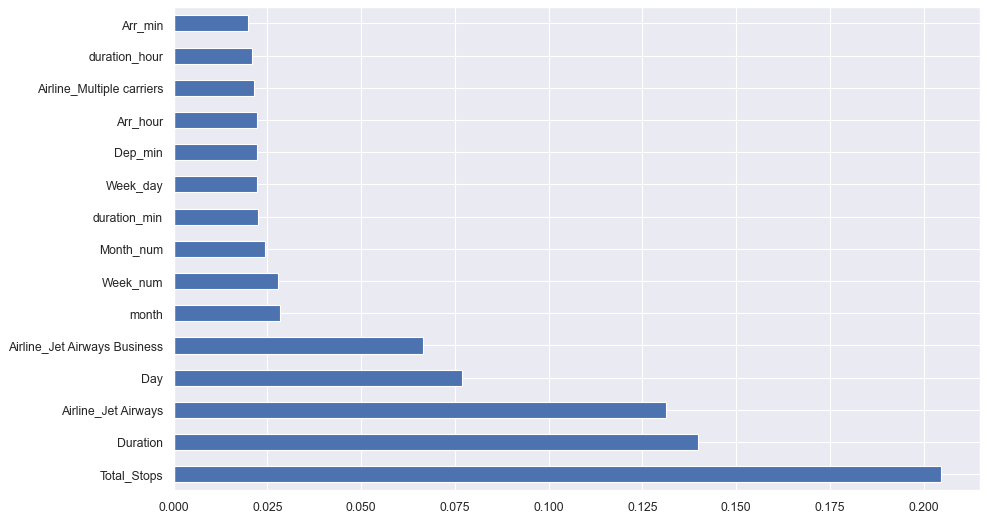

In [195]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(13,8), dpi= 80)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### 3- Correlation Matrix with Heatmap

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

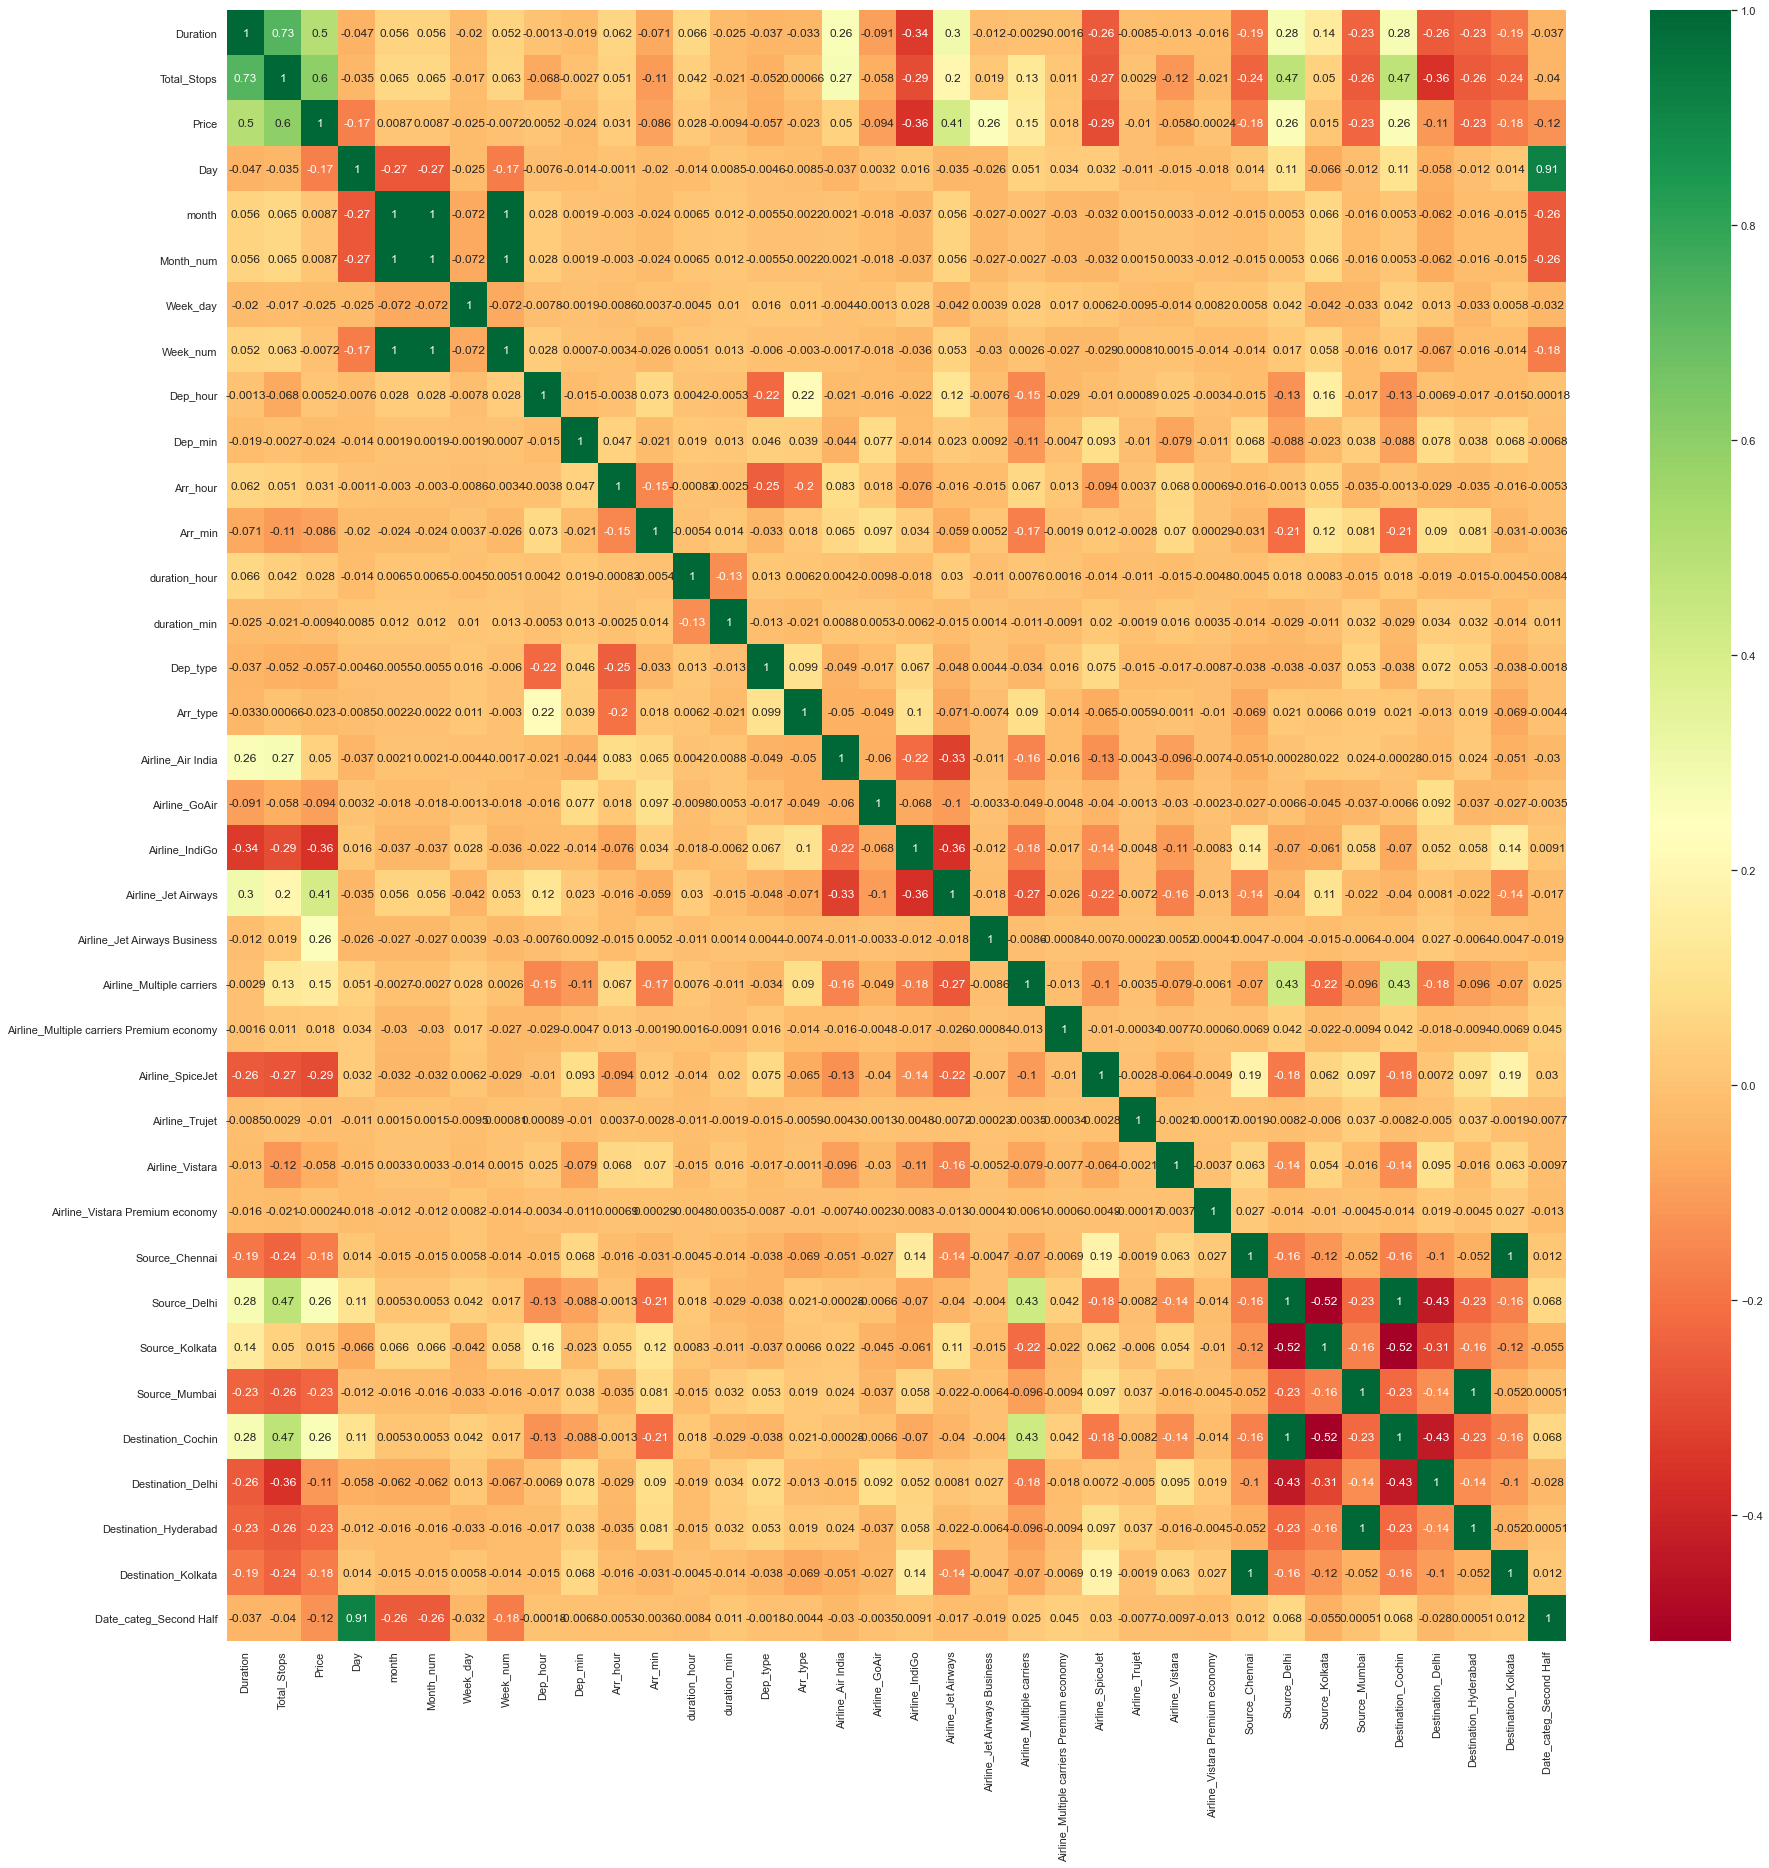

In [196]:
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

As we have too many features it's bit difficult to analyze the Correlation Matrix.

#### Awesome!!!!
 We are now done with the data preprocessing and feature engineering part and our dataset is ready for model building.
 

## <CENTER>PART 6 - MODEL SELECTION<CENTER>

The next step is selecting the best model and implementing it.
#### Models:
* Random Forest 
* KNN
* Ridge regressor
* Lasso regressor
* Decision Tree regressor
* XGB regressor  

In [197]:
#Import model dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [198]:
# Split data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [199]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(100 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7323, 35)
The size of training output is (7323, 1)
****************************************************************************************************
The size of testing input is (3139, 35)
The size of testing output is (3139, 1)


### 1- Random Forest 

In [200]:
# create regressor object 
rf_regressor = RandomForestRegressor() 

# fit the regressor with x and y data 
rf_regressor.fit(X_train, y_train)   



RandomForestRegressor()

In [201]:
#predict on X_test
y_test_pred = rf_regressor.predict(X_test)

In [202]:
#predict on X_train
y_train_pred = rf_regressor.predict(X_train)

Train Results

In [203]:
print("Train Results for Random Forest Regressor Model:")
print(100 * '*')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Random Forest Regressor Model:
****************************************************************************************************
Root mean squared error:  759.7681374608079
Mean absolute % error:  68.0
R-squared:  0.9733373176460439


Test results

In [204]:
print("Test Results for Random Forest Regressor Model:")
print(100 * '*')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
****************************************************************************************************
Root mean squared error:  1865.8706737672924
Mean absolute % error:  68.0
R-squared:  0.8323683317374687


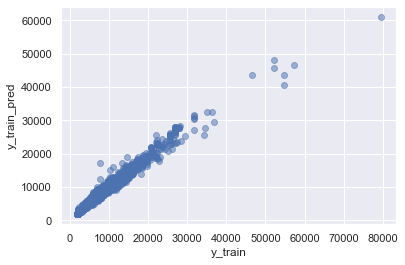

In [205]:
#Visualize train results
plt.scatter(y_train, y_train_pred, alpha = 0.5)
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

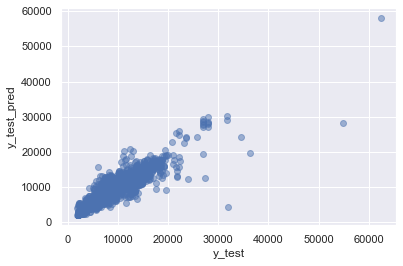

In [206]:
#Visualize test results
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

In [207]:
metrics.r2_score(y_test, y_test_pred)

0.8323683317374687

### 2-KNN

In [208]:
k_range = list(range(1, 20))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =5, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [209]:
y_train_pred =knn_regressor.predict(X_train) ##Predict on train 
y_test_pred =knn_regressor.predict(X_test) ##Predict on test 

Train results

In [210]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  3216.072414499681
Mean absolute % error:  24.0
R-squared:  0.5222581096946852


Test results

In [211]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  3341.9589930145407
Mean absolute % errorr:  26.0
R-squared:  0.462231669625662


### 3-Ridge regressor

In [212]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [213]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict on train 
y_test_pred =ridge_regressor.predict(X_test) ##Predict on test 

Train results

In [214]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2913.0026638056233
Mean absolute % error:  24.0
R-squared:  0.6080565155586689


Test results

In [215]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2932.1822826359016
Mean absolute % errorr:  26.0
R-squared:  0.5860242326081291


### 4- Lasso regressor

In [216]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [217]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict on train 
y_test_pred =lasso_regressor.predict(X_test) ##Predict on test 

Train results

In [218]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2916.678979844436
Mean absolute % error:  65.0
R-squared:  0.6070665972345417


Test results

In [219]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2933.228810231968
Mean absolute % errorr:  65.0
R-squared:  0.5857286750087647


### 5-Decision Tree regressor

In [220]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [221]:
y_train_pred =tree.predict(X_train) ##Predict on train 
y_test_pred =tree.predict(X_test) ##Predict on test 

Train results

In [222]:
print("Train Results for Decision tree regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Decision tree regressor Model:
--------------------------------------------------
Root mean squared error:  1889.4044390963543
Mean absolute % error:  67.0
R-squared:  0.835111051512355


Test results

In [223]:
print("Test Results for Decision tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2185.5120830747856
Mean absolute % errorr:  67.0
R-squared:  0.7700150520630876


### 6- XGB Regressor

In [224]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [225]:
y_train_pred =model.predict(X_train) ##Predict on train 
y_test_pred =model.predict(X_test) ##Predict on test 

Train results

In [226]:
print("Train Results for XGB regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for XGB regressor Model:
--------------------------------------------------
Root mean squared error:  1588.4840178906593
Mean absolute % error:  68.0
R-squared:  0.883451313068566


Test results

In [227]:
print("Test Results for XGB Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGB Regressor Model:
--------------------------------------------------
Root mean squared error:  1954.2528822831866
Mean absolute % errorr:  67.0
R-squared:  0.8161115247791375


### MODEL PREDICTION SUMMARY

Here are the test scores for the models we tried:
#### * Random Forest - 83.24%
#### * KNN - 52.2%
#### * Ridge regressor - 58.6%
#### * Lasso regressor - 60.7%
#### * Decision Tree regressor - 73.9%
#### * XGB regressor  - 83.03% 
It can be seen that the random forest regressor model and XGB regressor model performed really well compared to other algorithms.

## <center> PART 7 -HYPERPARAMETER TUNING<CENTER>

Let's fine tune our random forest model using RandomizedSearchCV.

In [228]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [230]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [231]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  13.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [232]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [233]:
#predict on X_test
y_test_pred = rf_random.predict(X_test)

In [234]:
#predict on X_train
y_train_pred = rf_random.predict(X_train)

Train results

In [235]:
print("Train Results for the tuned Random Forest Regressor Model:")
print(100 * '*')
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for the tuned Random Forest Regressor Model:
****************************************************************************************************
Root mean squared error:  767.5241800865093
Mean absolute % error:  68.0
R-squared:  0.9727901706236146


Test results

In [236]:
print("Test Results for the tuned Random Forest Regressor Model:")
print(100 * '*')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for the tuned Random Forest Regressor Model:
****************************************************************************************************
Root mean squared error:  1966.066406182161
Mean absolute % error:  67.0
R-squared:  0.813881581107252


##### RandomizedSearchCV is fitting the best_estimator after tuning using cv with the WHOLE training set. The score on the untuned model is probably higher because it uses much more data for training.
##### As we believe the tuned model produces an optimized result we will go with the tuned model to create a pickle file although we have a drop of 2% in the R2 score. 